# <center><b><font color="red">Sampling in Python</font></b></center>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!git clone "https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python.git"

Cloning into 'CAREER-TRACK-Data-Scientist-with-Python'...
remote: Enumerating objects: 3080, done.
remote: Counting objects: 100% (387/387), done.
remote: Compressing objects: 100% (259/259), done.
remote: Total 3080 (delta 124), reused 377 (delta 118), pack-reused 2693
Receiving objects: 100% (3080/3080), 444.73 MiB | 29.05 MiB/s, done.
Resolving deltas: 100% (1108/1108), done.
Updating files: 100% (840/840), done.


In [ ]:
url_coffee_rating = "/content/CAREER-TRACK-Data-Scientist-with-Python/21_Sampling_in_Python/_dataset/coffee_ratings.feather"
url_employee = "/content/CAREER-TRACK-Data-Scientist-with-Python/21_Sampling_in_Python/_dataset/employee.feather"
url_spotify = "/content/CAREER-TRACK-Data-Scientist-with-Python/21_Sampling_in_Python/_dataset/spotify.feather"

# **1️⃣Introduction to Sampling**

## **Sampling and point estimates**


#### **Simple sampling with pandas**


In [ ]:
import pandas as pd
import pyarrow.feather as feather

spotify_population = feather.read_feather(url_spotify)

# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
print(spotify_sample)

       acousticness                                     artists  danceability  \
25497       0.04070                            ['Modest Mouse']         0.646   
3825        0.03580                                  ['ODESZA']         0.612   
14796       0.30600                                ['En Vogue']         0.496   
10012       0.67800                                ['Amos Lee']         0.652   
38541       0.01570                                   ['Train']         0.608   
...             ...                                         ...           ...   
30842       0.00794                                ['DREAMERS']         0.515   
16171       0.55600                 ['Russ', 'Paulina', 'Jafé']         0.799   
12219       0.31000                  ['Nitty Gritty Dirt Band']         0.765   
32603       0.15700                           ['Blake Shelton']         0.581   
8942        0.28200  ['Mos Def', 'Pharoahe Monch', 'Nate Dogg']         0.654   

       duration_ms  duratio

In [ ]:
# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population["duration_minutes"].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample["duration_minutes"].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

3.8521519140900073
3.8862626000000002


#### **Simple sampling and calculating with NumPy**


In [ ]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Print the sample
print(loudness_samp)

4029     -6.434
31886    -1.898
4162     -6.107
12107    -2.757
1300     -5.649
          ...  
14156   -12.328
29505    -7.191
15463    -5.189
10582    -8.828
13236    -9.909
Name: loudness, Length: 100, dtype: float64


In [ ]:
import numpy as np

# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = np.mean(loudness_pop)

# Calculate the mean of loudness_samp
mean_loudness_samp = np.mean(loudness_samp)

# Print the means
print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-7.449569999999998


## **Convenience sampling**


#### **Are findings from the sample generalizable?**


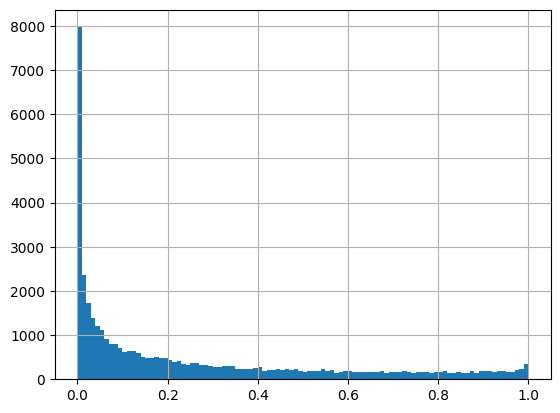

In [ ]:
import matplotlib.pyplot as plt

# Visualize the distribution of acousticness with a histogram
spotify_population['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()

In [31]:
# spotify_mysterious_sample
import pandas as pd
import random

# Create random data
data = []
for i in range(1107):
    row = {
        'acousticness': round(random.uniform(0.9, 1.0), 3),
        'artists': [f'Artist {i}'],
        'danceability': round(random.uniform(0.1, 0.9), 3),
        'duration_ms': random.randint(100000, 400000),
        'duration_minutes': 0.001 * random.randint(1000, 5000),
        'release_date': f'{random.randint(2000, 2023)}-01-01',
        'speechiness': round(random.uniform(0.01, 0.1), 3),
        'tempo': round(random.uniform(60, 180), 3),
        'valence': round(random.uniform(0.0, 0.5), 3),
        'year': random.randint(2000, 2023)
    }
    data.append(row)

# Create DataFrame
spotify_mysterious_sample = pd.DataFrame(data)

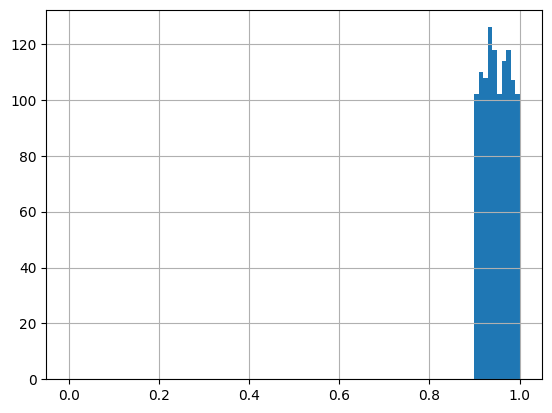

In [32]:
# Update the histogram to use spotify_mysterious_sample
spotify_mysterious_sample['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()

#### **Are these findings generalizable?**


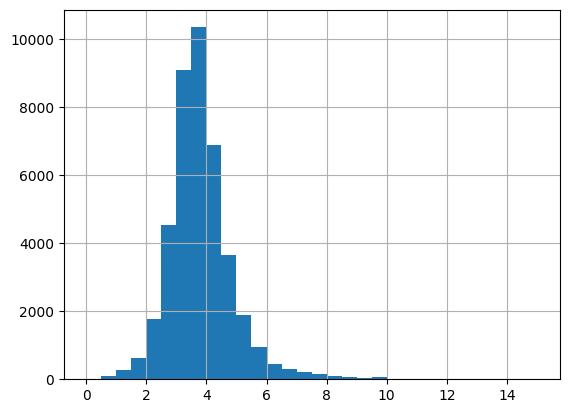

In [33]:
# Visualize the distribution of duration_minutes as a histogram
spotify_population['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5))
plt.show()

## **Pseudo-random number generation**


#### **Generating random numbers**


[-2.51859371  1.88674063 -2.77747768 ... -1.18043956  0.87441894
 -1.81012414]


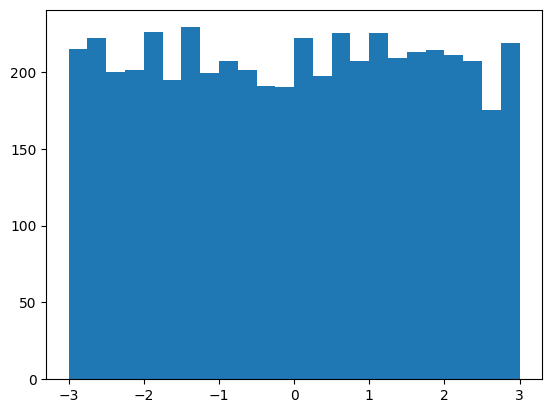

In [39]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Print uniforms
print(uniforms)

# Plot a histogram of uniform values, binwidth 0.25
plt.hist(uniforms, bins=np.arange(-3, 3.25, 0.25))
plt.show()

[4.94878545 9.60540068 6.92241662 ... 4.6944866  3.85708976 5.55313367]


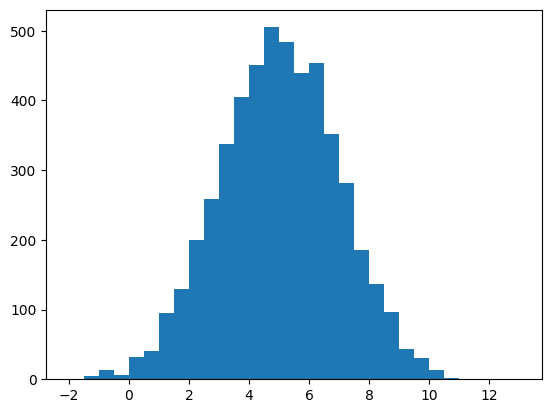

In [40]:
# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Print normals
print(normals)

# Plot a histogram of normal values, binwidth 0.5
plt.hist(normals, bins=np.arange(-2, 13.5, 0.5))
plt.show()

#### **Understanding random seeds**

In [44]:
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
y = np.random.normal(size=5)
print(x==y)

[False False False False False]


In [46]:
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(123)
y = np.random.normal(size=5)
print(x==y)

[ True  True  True  True  True]


In [47]:
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(456)
y = np.random.normal(size=5)
print(x==y)

[False False False False False]


# **2️⃣Sampling Methods**

## **Simple random and systematic sampling**


#### **Simple random sampling**


In [48]:
import pyarrow.feather as feather
import pandas as pd

attrition_pop = feather.read_feather(url_employee)

# Sample 70 rows using simple random sampling and set the seed
attrition_samp = attrition_pop.sample(n=70, random_state=18900217)

# Print the sample
print(attrition_samp)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1134   35        0.0      Travel_Rarely        583  Research_Development   
1150   52        0.0         Non-Travel        585                 Sales   
531    33        0.0      Travel_Rarely        931  Research_Development   
395    31        0.0      Travel_Rarely       1332  Research_Development   
392    29        0.0      Travel_Rarely        942  Research_Development   
...   ...        ...                ...        ...                   ...   
361    27        0.0  Travel_Frequently       1410                 Sales   
1180   36        0.0      Travel_Rarely        530                 Sales   
230    26        0.0      Travel_Rarely       1443                 Sales   
211    29        0.0  Travel_Frequently        410  Research_Development   
890    30        0.0  Travel_Frequently       1312  Research_Development   

      DistanceFromHome      Education    EducationField  \
1134                25      

#### **Systematic sampling**


In [64]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size // sample_size

# Systematically sample 70 rows
attrition_sys_samp = attrition_pop.iloc[::interval]

# Print the sample
print(attrition_sys_samp)

      Age  Attrition BusinessTravel  DailyRate            Department  \
0      21        0.0  Travel_Rarely        391  Research_Development   
21     19        0.0  Travel_Rarely       1181  Research_Development   
42     45        0.0  Travel_Rarely        252  Research_Development   
63     23        0.0  Travel_Rarely        373  Research_Development   
84     30        1.0  Travel_Rarely        945                 Sales   
...   ...        ...            ...        ...                   ...   
1365   48        0.0  Travel_Rarely        715  Research_Development   
1386   48        0.0  Travel_Rarely       1355  Research_Development   
1407   50        0.0  Travel_Rarely        989  Research_Development   
1428   50        0.0     Non-Travel        881  Research_Development   
1449   52        0.0  Travel_Rarely        699  Research_Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                   15        College  Life_Sciences   

#### **Is systematic sampling OK?**


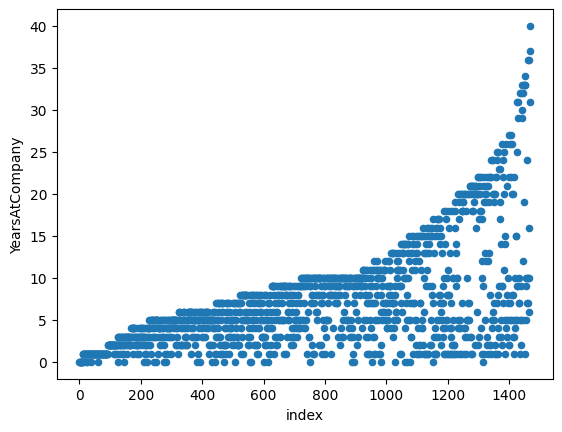

In [51]:
import matplotlib.pyplot as plt

# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(x="index", y="YearsAtCompany", kind="scatter")
plt.show()

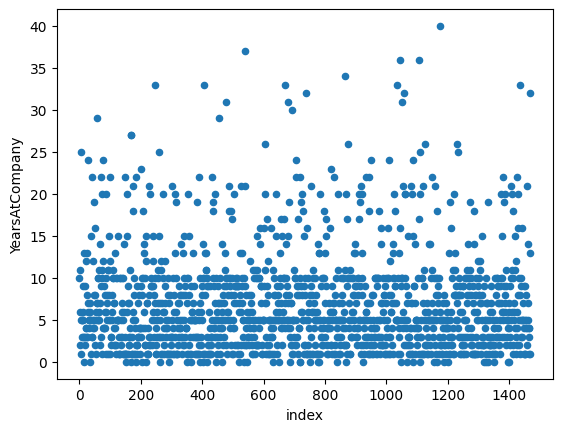

In [52]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1)

# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(x="index", y="YearsAtCompany", kind="scatter")
plt.show()

## **Stratified and weighted random sampling**


#### **Proportional stratified sampling**


In [66]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop['Education'].value_counts(normalize=True)

# Print education_counts_pop
print(education_counts_pop)

Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: Education, dtype: float64


In [69]:
# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby('Education')\
                               .sample(frac=0.4, random_state=2022)

# Print the sample
display(attrition_strat.head(2))

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1191,53,0.0,Travel_Rarely,238,Sales,1,Below_College,Medical,Very_High,Female,...,Outstanding,Very_High,0,18,2,Best,14,7,8,10
407,29,0.0,Travel_Frequently,995,Research_Development,2,Below_College,Life_Sciences,Low,Male,...,Excellent,Very_High,1,6,0,Best,6,4,1,3


In [55]:
# Calculate the Education level proportions from attrition_strat
education_counts_strat = attrition_strat['Education'].value_counts(normalize=True)

# Print education_counts_strat
print(education_counts_strat)

Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: Education, dtype: float64


#### **Equal counts stratified sampling**


In [70]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby('Education')\
                            .sample(n=30, random_state=2022)

# Print the sample
display(attrition_eq.head(5))

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1191,53,0.0,Travel_Rarely,238,Sales,1,Below_College,Medical,Very_High,Female,...,Outstanding,Very_High,0,18,2,Best,14,7,8,10
407,29,0.0,Travel_Frequently,995,Research_Development,2,Below_College,Life_Sciences,Low,Male,...,Excellent,Very_High,1,6,0,Best,6,4,1,3
1233,59,0.0,Travel_Frequently,1225,Sales,1,Below_College,Life_Sciences,Low,Female,...,Excellent,Very_High,0,20,2,Good,4,3,1,3
366,37,0.0,Travel_Rarely,571,Research_Development,10,Below_College,Life_Sciences,Very_High,Female,...,Excellent,Medium,2,6,3,Good,5,3,4,3
702,31,0.0,Travel_Frequently,163,Research_Development,24,Below_College,Technical_Degree,Very_High,Female,...,Outstanding,Very_High,0,9,3,Good,5,4,1,4


In [57]:
# Get the proportions from attrition_eq
education_counts_eq = attrition_eq['Education'].value_counts(normalize=True)

# Print the results
print(education_counts_eq)

Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: Education, dtype: float64


#### **Weighted sampling**


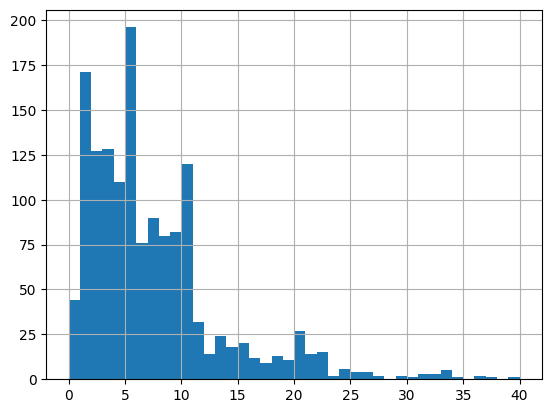

In [58]:
import numpy as np

# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

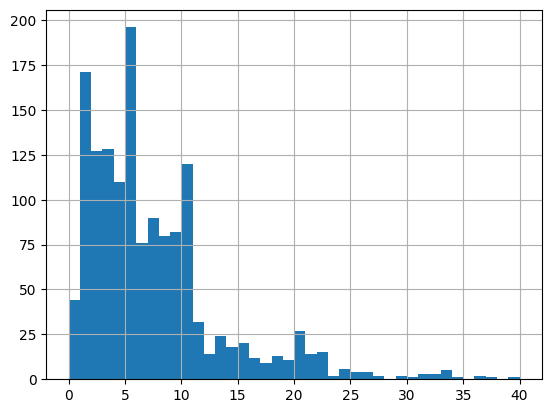

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
969,38,0.0,Travel_Rarely,702,Sales,1,Master,Life_Sciences,Low,Female,...,Outstanding,High,0,12,2,Best,8,3,0,7
1172,42,0.0,Travel_Rarely,1265,Research_Development,3,Bachelor,Life_Sciences,High,Female,...,Excellent,Medium,1,17,1,Good,5,3,1,3
1269,45,0.0,Travel_Rarely,1385,Research_Development,20,College,Medical,High,Male,...,Excellent,Medium,0,21,2,Better,20,7,4,10


In [74]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")

# Print the sample
display(attrition_weight.head(3))

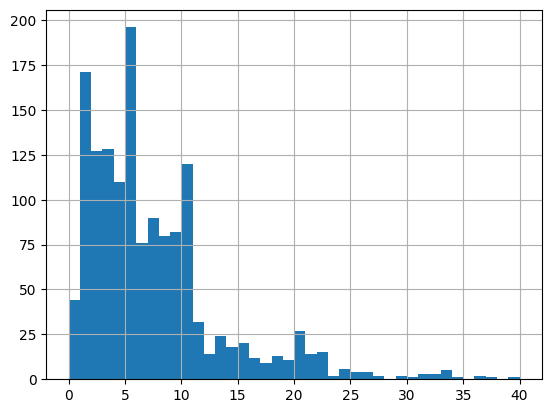

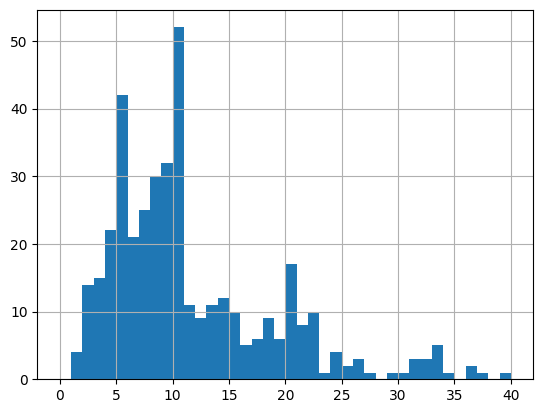

In [72]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")

# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

## **Cluster sampling**


#### **Performing cluster sampling**

In [61]:
import random

# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k=4)

# Print the result
print(job_roles_samp)

['Manager', 'Sales_Representative', 'Research_Scientist', 'Manufacturing_Director']


In [76]:
# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]

# Print the result
display(attrition_filtered.head(3))

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,Male,...,Excellent,Very_High,0,0,2,Good,0,0,0,0
3,18,0.0,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very_High,Female,...,Excellent,Low,0,0,2,Better,0,0,0,0


In [77]:
# Remove categories with no rows
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby("JobRole").sample(n=10, random_state=2022)

# Print the sample
display(attrition_clust)

<ipython-input-77-6b088c102209>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1380,44,0.0,Travel_Rarely,1099,Sales,5,Bachelor,Marketing,Medium,Male,...,Excellent,High,1,26,5,Better,22,9,3,10
1395,46,0.0,Travel_Rarely,488,Sales,2,Bachelor,Technical_Degree,High,Female,...,Excellent,Medium,1,28,2,Good,7,7,7,7
1300,42,0.0,Travel_Rarely,532,Research_Development,4,College,Technical_Degree,High,Male,...,Excellent,Very_High,0,22,3,Better,22,17,11,15
1271,39,0.0,Travel_Rarely,117,Research_Development,10,Below_College,Medical,High,Male,...,Excellent,Very_High,0,21,3,Better,21,9,11,10
1354,42,0.0,Travel_Rarely,1059,Research_Development,9,College,Other,Very_High,Male,...,Outstanding,Very_High,0,24,2,Better,1,0,0,1
858,32,0.0,Travel_Rarely,495,Research_Development,10,Bachelor,Medical,High,Male,...,Outstanding,Medium,0,10,5,Best,5,2,0,0
1417,59,0.0,Non-Travel,1420,Human_Resources,2,Master,Human_Resources,High,Female,...,Outstanding,Very_High,1,30,3,Better,3,2,2,2
1307,41,0.0,Travel_Rarely,1276,Sales,2,Doctor,Life_Sciences,Medium,Female,...,Excellent,Medium,1,22,2,Better,18,16,11,8
1377,52,0.0,Travel_Rarely,1053,Research_Development,1,College,Life_Sciences,Very_High,Male,...,Excellent,Medium,1,26,2,Good,9,8,7,8
1388,50,0.0,Travel_Rarely,264,Sales,9,Bachelor,Marketing,High,Male,...,Excellent,High,1,27,2,Better,1,0,0,0


## **Comparing sampling methods**


#### **3 kinds of sampling**


In [79]:
# Perform simple random sampling to get 0.25 of the population
attrition_srs = attrition_pop.sample(frac=0.25, random_state=2022)

In [78]:
# Perform stratified sampling to get 0.25 of each relationship group
attrition_strat = attrition_pop.groupby("RelationshipSatisfaction").sample(frac=0.25, random_state=2022)

In [85]:
# Create a list of unique RelationshipSatisfaction values
satisfaction_unique = list(attrition_pop['RelationshipSatisfaction'].unique())

# Randomly sample 2 unique satisfaction values
satisfaction_samp = random.sample(satisfaction_unique, k=2)

# Filter for satisfaction_samp and clear unused categories from RelationshipSatisfaction
satis_condition = attrition_pop['RelationshipSatisfaction'].isin(satisfaction_samp)
attrition_clust_prep = attrition_pop[satis_condition]
attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()

# Perform cluster sampling on the selected group, getting 0.25 of attrition_pop
attrition_clust = attrition_clust_prep.groupby("RelationshipSatisfaction").sample(n=len(attrition_pop) // 4, random_state=2022)

<ipython-input-85-6c3d223edd9b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()


#### **Comparing point estimates**

In [80]:
# Mean Attrition by RelationshipSatisfaction group
mean_attrition_pop = attrition_pop.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_pop)

RelationshipSatisfaction
Low          0.206522
Medium       0.148515
High         0.154684
Very_High    0.148148
Name: Attrition, dtype: float64


In [81]:
# Calculate the same thing for the simple random sample
mean_attrition_srs = attrition_srs.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_srs)

RelationshipSatisfaction
Low          0.134328
Medium       0.164179
High         0.160000
Very_High    0.155963
Name: Attrition, dtype: float64


In [82]:
# Calculate the same thing for the stratified sample
mean_attrition_strat = attrition_strat.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_strat)

RelationshipSatisfaction
Low          0.144928
Medium       0.078947
High         0.165217
Very_High    0.129630
Name: Attrition, dtype: float64


In [83]:
# Calculate the same thing for the cluster sample
mean_attrition_clust = attrition_clust.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_clust)

RelationshipSatisfaction
Low          0.428571
Medium       0.166667
High         0.000000
Very_High    0.055556
Name: Attrition, dtype: float64


# **3️⃣Sampling Distributions**

## **Relative error of point estimates**


#### **Calculating relative errors**


In [90]:
import pandas as pd
import pyarrow.feather as feather
import numpy as np

attrition_pop = feather.read_feather(url_employee)
mean_attrition_pop = attrition_pop.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 = attrition_pop.sample(n=50, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct50 = 100 * abs(mean_attrition_pop - mean_attrition_srs50) / mean_attrition_pop

# Print rel_error_pct50
print(rel_error_pct50)

RelationshipSatisfaction
Low          70.947368
Medium       59.600000
High         61.211268
Very_High    59.500000
Name: Attrition, dtype: float64


In [92]:
# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n=100, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct100 = 100 * abs(mean_attrition_pop-mean_attrition_srs100) / mean_attrition_pop

# Print rel_error_pct100
print(rel_error_pct100)

RelationshipSatisfaction
Low          27.368421
Medium        1.000000
High          3.028169
Very_High     1.250000
Name: Attrition, dtype: float64


## **Creating a sampling distribution**


#### **Replicating samples**


[0.2, 0.13333333333333333, 0.13333333333333333, 0.08333333333333333, 0.13333333333333333]


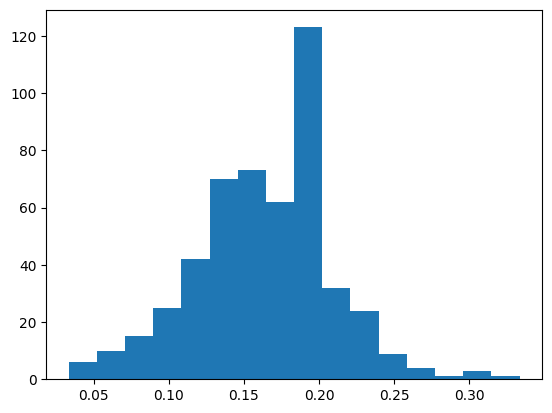

In [94]:
# Create an empty list
mean_attritions = []
# Loop 500 times to create 500 sample means
for i in range(500):
    mean_attritions.append(
    attrition_pop.sample(n=60)['Attrition'].mean())

# Print out the first few entries of the list
print(mean_attritions[0:5])

# Create a histogram of the 500 sample means
plt.hist(mean_attritions, bins=16)
plt.show()

## **Approximate sampling distributions**


#### **Exact sampling distribution**


In [96]:
import itertools

def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

# Expand a grid representing 5 8-sided dice
dice = expand_grid(
  {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
   'die2': [1, 2, 3, 4, 5, 6, 7, 8],
   'die3': [1, 2, 3, 4, 5, 6, 7, 8],
   'die4': [1, 2, 3, 4, 5, 6, 7, 8],
   'die5': [1, 2, 3, 4, 5, 6, 7, 8]
  })

# Print the result
print(dice)

       die1  die2  die3  die4  die5
0         1     1     1     1     1
1         1     1     1     1     2
2         1     1     1     1     3
3         1     1     1     1     4
4         1     1     1     1     5
...     ...   ...   ...   ...   ...
32763     8     8     8     8     4
32764     8     8     8     8     5
32765     8     8     8     8     6
32766     8     8     8     8     7
32767     8     8     8     8     8

[32768 rows x 5 columns]


In [97]:
# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1'] + dice['die2'] +
                     dice['die3'] + dice['die4'] +
                     dice['die5']) / 5
dice['mean_roll'] = dice['mean_roll'].astype('category')

# Print result
print(dice)

       die1  die2  die3  die4  die5 mean_roll
0         1     1     1     1     1       1.0
1         1     1     1     1     2       1.2
2         1     1     1     1     3       1.4
3         1     1     1     1     4       1.6
4         1     1     1     1     5       1.8
...     ...   ...   ...   ...   ...       ...
32763     8     8     8     8     4       7.2
32764     8     8     8     8     5       7.4
32765     8     8     8     8     6       7.6
32766     8     8     8     8     7       7.8
32767     8     8     8     8     8       8.0

[32768 rows x 6 columns]


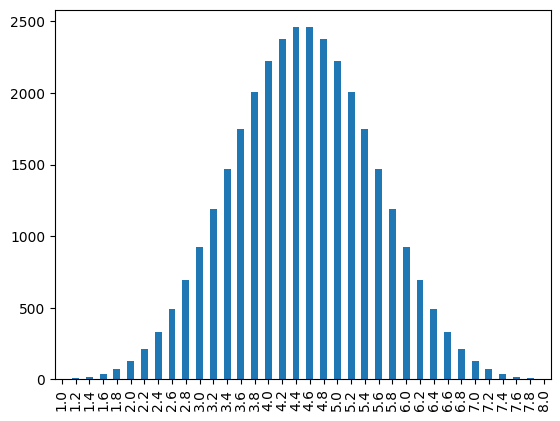

In [98]:
# Draw a bar plot of mean_roll
dice['mean_roll'].value_counts(sort=False).plot(kind="bar")
plt.show()

#### **Generating an approximate sampling distribution**


In [99]:
# Sample one to eight, five times, with replacement
five_rolls = np.random.choice(list(range(1, 9)), size=5, replace=True)

# Print the mean of five_rolls
print(five_rolls.mean())

3.2


In [100]:
# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
    np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )

# Print the first 10 entries of the result
print(sample_means_1000[0:10])

[3.8, 4.0, 4.4, 4.2, 5.0, 5.0, 5.2, 4.8, 2.2, 4.8]


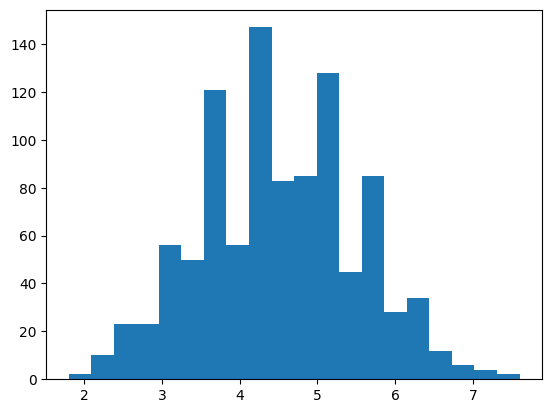

In [101]:
# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000, bins=20)
plt.show()

## **Standard errors and the Central Limit Theorem**


#### **Population & sampling distribution means**


In [108]:
import numpy as np

# Define the sampling distributions
import random

sampling_distribution_5 = [random.uniform(0, 1) for _ in range(500)]
sampling_distribution_50 = [random.uniform(0, 50) for _ in range(500)]
sampling_distribution_500 = [random.uniform(0, 500) for _ in range(500)]

# Calculate the mean of the mean attritions for each sampling distribution
mean_of_means_5 = np.mean(sampling_distribution_5)
mean_of_means_50 = np.mean(sampling_distribution_50)
mean_of_means_500 = np.mean(sampling_distribution_500)

# Print the results
print("# Calculate the mean of the mean attritions for each sampling distribution")
print("mean_of_means_5 =", mean_of_means_5)
print("mean_of_means_50 =", mean_of_means_50)
print("mean_of_means_500 =", mean_of_means_500)



# Calculate the mean of the mean attritions for each sampling distribution
mean_of_means_5 = 0.4965979544065647
mean_of_means_50 = 25.6028901509622
mean_of_means_500 = 253.99320946542716


#### **Population & sampling distribution variation**

In [110]:
# Calculate the std. dev. of the mean attritions for each sampling distribution
sd_of_means_5 = np.std(sampling_distribution_5, ddof=1)
sd_of_means_50 = np.std(sampling_distribution_50, ddof=1)
sd_of_means_500 = np.std(sampling_distribution_500, ddof=1)

# Print the results
print(sd_of_means_5)
print(sd_of_means_50)
print(sd_of_means_500)

0.2918107182455146
13.919907975007385
143.49358507973994


# **4️⃣Bootstrap Distributions**

## **Introduction to bootstrapping**


In [113]:
import pandas as pd
import pyarrow.feather as feather
import matplotlib.pyplot as plt


spotify_population = feather.read_feather(url_spotify)

# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1, replace=True)

# Print the resample
display(spotify_1_resample.head(3))

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
32641,0.1990,"['Miley Cyrus', 'French Montana']",0.548,229693.0,3.828217,0.833,1.0,6dDIOU6AqgLkrjFNPgvKY6,0.0,7.0,0.3050,-3.294,1.0,FU (feat. French Montana),60.0,2013-10-04,0.0497,190.029,0.467,2013.0
20086,0.0369,['Kat Graham'],0.456,240307.0,4.005117,0.843,0.0,65YThnxDm8OZPT6vdSwqbT,0.0,1.0,0.0453,-2.724,1.0,Power,53.0,2013-01-01,0.0595,161.844,0.560,2013.0
3324,0.0261,"['Jake Owen', 'Florida Georgia Line']",0.510,220267.0,3.671117,0.960,0.0,0s77V2jfwyd8Mz5YHFXPJi,0.0,3.0,0.1320,-4.458,1.0,Summer Jam (feat. Florida Georgia Line) (feat....,48.0,2012-09-25,0.0433,80.000,0.922,2012.0


#### **Generating a bootstrap distribution**


In [116]:
# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1, replace=True)

# Print the resample
display(spotify_1_resample.head(2))

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
16694,0.173000,['Donna The Buffalo'],0.667,262333.0,4.372217,0.465,0.0,0wgEtvVLi4ZJZPvYLM3omN,0.000055,9.0,0.0936,-9.765,1.0,No Place Like The Right Time,34.0,2000,0.0275,139.256,0.689,2000.0
19240,0.000659,"['Talib Kweli', 'Mary J. Blige']",0.732,265107.0,4.418450,0.687,1.0,67KzM4JakJxpVAW8IlI2N0,0.001170,11.0,0.2550,-6.866,0.0,I Try,40.0,2004-01-01,0.0765,96.740,0.474,2004.0


In [117]:
# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1, replace=True)


# Calculate mean danceability of resample
mean_danceability_1 = np.mean(spotify_1_resample['danceability'])

# Print the result
print(mean_danceability_1)

0.5960335999999999


In [118]:
# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
    mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability']))

# Print the result
print(mean_danceability_1000)

[0.5973619, 0.6036469, 0.5982152, 0.5960334, 0.5974265000000001, 0.6000173999999999, 0.6001599999999999, 0.5969961, 0.5852787, 0.5915001, 0.5975928, 0.5914001000000001, 0.5931522, 0.5899354, 0.5882528, 0.5923827, 0.5929275, 0.5988841, 0.5902705, 0.6021525999999999, 0.5970943999999999, 0.5860986, 0.5992679000000001, 0.5923544999999999, 0.5926642, 0.5936959, 0.5982940999999999, 0.5903917000000001, 0.5970093999999999, 0.58696, 0.5917875, 0.5953942, 0.5971955, 0.5908053999999999, 0.5992468, 0.5916144000000001, 0.5913842, 0.5919134, 0.5912652, 0.5957511, 0.5887918, 0.5859605999999998, 0.6028255, 0.5926988, 0.5921428, 0.5868105, 0.5940314000000001, 0.589731, 0.5930794, 0.5943685000000001, 0.5901222, 0.5837316, 0.5900594, 0.5931687, 0.5933744, 0.5969041, 0.597241, 0.5927717, 0.5964366999999999, 0.5945147, 0.5941096, 0.5917658, 0.5946579999999999, 0.5939008, 0.5960310999999999, 0.5919571, 0.5811628, 0.6031692000000001, 0.5933142, 0.5939312999999999, 0.5972970000000001, 0.5965345, 0.5995364, 0.

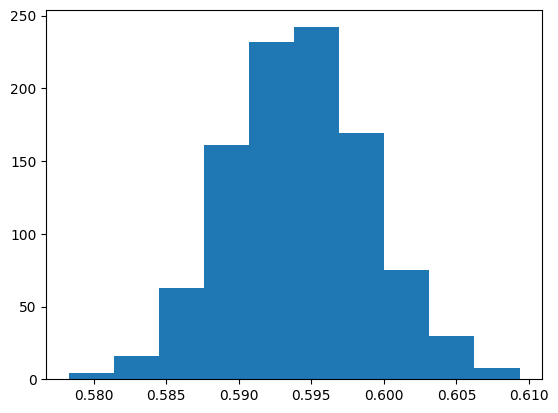

In [119]:
# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
	)

# Draw a histogram of the resample means
plt.hist(mean_danceability_1000)
plt.show()

## **Comparing sampling and bootstrap distributions**


#### **Sampling distribution vs. bootstrap distribution**


In [130]:
bootstrap_distribution = []

# Generate a sampling distribution of 2000 replicates
for i in range(2000):
    bootstrap_distribution.append(
        # Sample 500 rows and calculate the mean popularity
        spotify_population.sample(n=500)['popularity'].mean())

# Print the sampling distribution results
print(bootstrap_distribution)

[55.048, 55.232, 54.418, 54.986, 53.358, 54.424, 54.822, 54.516, 54.444, 54.834, 55.78, 54.676, 55.454, 55.106, 55.338, 55.418, 54.224, 55.528, 55.236, 54.582, 54.902, 54.212, 54.542, 54.858, 54.72, 55.094, 54.548, 54.46, 54.686, 53.624, 55.6, 54.538, 55.444, 55.056, 54.64, 55.06, 54.892, 54.04, 55.326, 54.692, 54.668, 54.678, 55.63, 55.612, 55.198, 54.982, 54.778, 54.884, 55.256, 55.726, 54.492, 55.786, 54.524, 54.266, 54.32, 54.598, 54.884, 54.408, 54.458, 55.616, 54.65, 55.102, 54.276, 54.442, 54.48, 54.868, 55.254, 54.708, 55.918, 53.954, 54.64, 55.74, 55.304, 54.314, 55.302, 54.52, 54.396, 54.21, 53.7, 54.264, 54.788, 55.276, 54.344, 55.55, 54.412, 54.178, 55.096, 55.716, 54.016, 55.506, 54.418, 54.606, 54.486, 55.12, 54.304, 54.314, 54.76, 54.894, 54.702, 54.44, 55.126, 56.126, 55.154, 54.698, 54.464, 54.486, 53.81, 56.146, 55.056, 54.702, 54.024, 54.064, 54.962, 54.056, 54.628, 55.198, 55.018, 54.94, 55.82, 54.288, 54.77, 55.2, 54.404, 54.844, 55.066, 54.938, 54.404, 54.668, 55.

**with replacement**

In [131]:
bootstrap_distribution = []

# Generate a bootstrap distribution of 2000 replicates
for i in range(2000):
    bootstrap_distribution.append(
    	# Resample 500 rows and calculate the mean popularity
    	spotify_sample.sample(n=500, replace=True)['popularity'].mean()
    )

# Print the bootstrap distribution results
print(bootstrap_distribution)

[54.682, 54.848, 54.56, 55.0, 55.146, 55.592, 55.066, 54.632, 55.68, 55.334, 55.052, 55.588, 55.478, 55.382, 55.754, 55.224, 55.006, 55.192, 55.928, 55.22, 54.692, 55.944, 55.422, 54.782, 55.58, 54.862, 54.706, 55.008, 54.738, 55.266, 56.488, 54.6, 55.502, 56.01, 54.038, 55.032, 55.1, 54.622, 55.016, 54.7, 55.17, 54.958, 55.984, 54.382, 54.718, 55.026, 54.854, 54.37, 54.268, 54.722, 54.786, 56.16, 54.974, 55.68, 55.782, 55.396, 54.462, 55.04, 54.904, 55.364, 55.69, 55.126, 55.832, 54.308, 55.066, 54.308, 54.878, 55.634, 55.686, 54.89, 54.9, 54.556, 54.58, 55.278, 54.76, 55.208, 55.754, 55.03, 54.692, 54.274, 55.26, 55.576, 54.3, 54.134, 55.558, 55.156, 55.45, 54.99, 55.004, 54.964, 55.332, 55.462, 55.328, 55.522, 55.058, 55.002, 55.338, 55.422, 54.836, 54.614, 55.018, 55.5, 54.988, 55.268, 55.14, 54.922, 55.656, 55.092, 54.414, 55.74, 55.246, 54.504, 54.748, 55.31, 54.728, 55.922, 55.598, 54.82, 54.086, 55.374, 55.514, 55.24, 55.248, 54.982, 55.112, 55.25, 54.204, 54.45, 55.152, 55.136

#### **Compare sampling and bootstrap means**


In [132]:
# Calculate the population mean popularity
pop_mean = spotify_population['popularity'].mean()

# Calculate the original sample mean popularity
samp_mean = spotify_sample['popularity'].mean()

# Calculate the sampling dist'n estimate of mean popularity
samp_distn_mean = np.mean(bootstrap_distribution)

# Calculate the bootstrap dist'n estimate of mean popularity
boot_distn_mean = np.mean(bootstrap_distribution)

# Print the means
print([pop_mean, samp_mean, samp_distn_mean, boot_distn_mean])

[54.837142308430955, 55.06, 55.064763000000006, 55.064763000000006]


#### **Compare sampling and bootstrap standard deviations**


In [133]:
# Calculate the population std dev popularity
pop_sd = spotify_population['popularity'].std(ddof=0)

# Calculate the original sample std dev popularity
samp_sd = spotify_sample['popularity'].std()

# Calculate the sampling dist'n estimate of std dev popularity
samp_distn_sd = np.std(bootstrap_distribution, ddof=1) * np.sqrt(5000)

# Calculate the bootstrap dist'n estimate of std dev popularity
boot_distn_sd = np.std(bootstrap_distribution, ddof=1) * np.sqrt(5000)

# Print the standard deviations
print([pop_sd, samp_sd, samp_distn_sd, boot_distn_sd])

[10.880065274257536, 11.012341788723763, 34.065783389700236, 34.065783389700236]


## **Confidence intervals**


#### **Calculating confidence intervals**

In [137]:
from scipy.stats import norm

# Generate a 95% confidence interval using the quantile method
lower_quant = np.quantile(bootstrap_distribution, 0.025)
upper_quant = np.quantile(bootstrap_distribution, 0.975)

# Print quantile method confidence interval
print((lower_quant, upper_quant))

# Find the mean and std dev of the bootstrap distribution
point_estimate = np.mean(bootstrap_distribution)
standard_error = np.std(bootstrap_distribution, ddof=1)

# Find the lower limit of the confidence interval
lower_se = norm.ppf(0.025, loc=point_estimate, scale=standard_error)

# Find the upper limit of the confidence interval
upper_se = norm.ppf(0.975, loc=point_estimate, scale=standard_error)

# Print standard error method confidence interval
print((lower_se, upper_se))

(54.159699999999994, 56.00405)
(54.12052501041494, 56.009000989585076)


#### $\color{skyblue}{\textbf{Connect with me:}}$


[<img align="left" src="https://cdn4.iconfinder.com/data/icons/social-media-icons-the-circle-set/48/twitter_circle-512.png" width="32px"/>][twitter]
[<img align="left" src="https://cdn-icons-png.flaticon.com/512/145/145807.png" width="32px"/>][linkedin]
[<img align="left" src="https://cdn2.iconfinder.com/data/icons/whcompare-blue-green-web-hosting-1/425/cdn-512.png" width="32px"/>][Portfolio]

[twitter]: https://twitter.com/F4izy
[linkedin]: https://www.linkedin.com/in/mohd-faizy/
[Portfolio]: https://mohdfaizy.com/
